# Effective Visibilities from Model Data

In [1]:
import argparse
import numpy as np
import os
import sys
import h5py

import astropy.units as u

sys.path.append("/users/pkeller/code/ClosureSim/skysim")
from vis import VisData

%matplotlib notebook
import matplotlib.pyplot as plt

 ## Load Data

In [2]:
# data directory
ddir = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/"

# triad names
trname = "EQ14"

eicp_xx = []
eicp_yy = []
scaling_array = []
lst = []
alst = []

for fname in ["A", "B", "C"]:
    name = f"{trname}_F{fname}"
    path = os.path.join(ddir, f"{name}_B2.h5")

    with h5py.File(path, "r") as f:
        eicp_xx.append(np.nanmean(f[f"eicp jdmed (2) XX model"][()], axis=1))
        eicp_yy.append(np.nanmean(f[f"eicp jdmed (2) YY model"][()], axis=1))
        lst.append(f["LST"][()])
              
    scaling_path_model = f"/users/pkeller/code/H1C_IDR3.2/data/veff_{trname}_F{fname}B2_model.dat"
    scaling_array.append(np.loadtxt(scaling_path_model))

eicp_xx = np.concatenate(eicp_xx, axis=1)
eicp_yy = np.concatenate(eicp_yy, axis=1)
scaling_array = np.hstack(scaling_array)
lst = np.hstack(lst)

## Apply Scaling and Compute Noise

In [3]:
deicp_xx = ((eicp_xx[1] - eicp_xx[0]).T * scaling_array[0]).T
deicp_yy = ((eicp_yy[1] - eicp_yy[0]).T * scaling_array[1]).T
noise_xx = np.sqrt(np.nanmean(np.abs(deicp_xx)**2, axis=-1))
noise_yy = np.sqrt(np.nanmean(np.abs(deicp_yy)**2, axis=-1))

## Plot

<IPython.core.display.Javascript object>


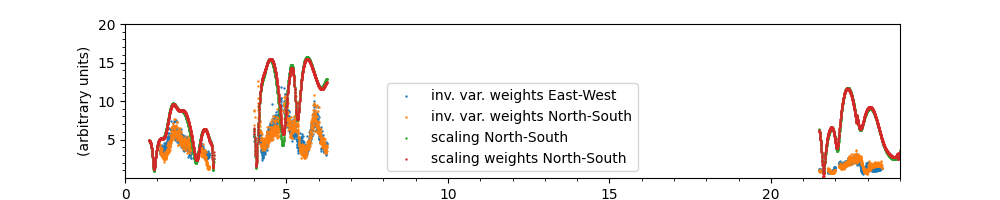

In [7]:
fig, ax = plt.subplots(figsize=(10, 2))
idx = np.where(np.all(scaling_array > 5, axis=0))

ax.scatter(lst[idx], noise_xx[idx]**-2, label="inv. var. weights East-West", s=0.5)
ax.scatter(lst[idx], noise_yy[idx]**-2, label="inv. var. weights North-South", s=0.5)
ax.scatter(lst, scaling_array[0], label="scaling North-South", s=0.5)
ax.scatter(lst, scaling_array[1], label="scaling weights North-South", s=0.5)
ax.legend()
ax.set_xlabel("LST (h)")
ax.set_ylabel("(arbitrary units)")
ax.set_xlim([0, 24])
#ax.set_yscale("log")
ax.set_ylim([1e-2, 2e1])
plt.minorticks_on()